## Data inladen en preprocessen

In [63]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [64]:
FileNotFound = True
while FileNotFound:
    try:
        directory = input("""Please add the directory you're data is in. 
         If you're using our original provided files this should be 'data'\n""")
        datasets = [filename for filename in os.listdir(directory)]
        FileNotFound = False
    except FileNotFoundError:
        print("Please add a valid directory")
        FileNotFound = True

datasets.remove('DataReadMe.pdf')

Please add the directory you're data is in. 
         If you're using our original provided files this should be 'data'
data


In [65]:
data = {}
for dataset in datasets:
    GHClim = pd.read_csv(f"data/{dataset}/Greenhouse_climate.csv") 
    Crop = pd.read_csv(f"data/{dataset}/CropManagement.csv") 
    irri = pd.read_csv(f"data/{dataset}/Irrigation.csv") 
    prod = pd.read_csv(f"data/{dataset}/Production.csv") 
    vip = pd.read_csv(f"data/{dataset}/vip.csv") 
    GHClim = GHClim.drop(['VentLee', 'Ventwind', 'AssimLight', 'BlackScr', 'EnScr'], axis=1)
    
    # Fill NaN's with next occuring value
    GHClim.fillna(method='ffill', inplace=True)
    Crop.fillna(method='ffill', inplace=True)
    irri.fillna(method='ffill', inplace=True)
    prod.fillna(method='ffill', inplace=True)
    vip.fillna(method='ffill', inplace=True)
    
    # If the last row is NaN, fill it with the previous value
    GHClim.fillna(method='bfill', inplace=True)
    Crop.fillna(method='bfill', inplace=True)
    irri.fillna(method='bfill', inplace=True)
    prod.fillna(method='bfill', inplace=True)
    vip.fillna(method='bfill', inplace=True)
    
    # Interpolate the datapoints to artificially increase the amount of data 
    prod['time'] = prod['time']*288 - 12477888
    prod = prod.set_index('time')
    prod = prod.reindex(range(prod.index.min(),prod.index.max()+1)).reset_index()
    prod = prod.interpolate()
    prod.set_index('time')
    prod = prod.drop(['time'], axis=1)
    GHClim = GHClim.drop(['GHtime'], axis=1)
    GHClim = GHClim[:-12]
    vip = vip[:-12]
    
    data[dataset] = {'GHClim':GHClim, 'Crop':Crop, 'irri':irri, 'prod':prod, 'vip':vip}

In [61]:
# Feature information is retrieved from the ReadMe.pdf from the Automonous greenhouse challenge
features_ghclim = {'Tair': ['Air temperature greenhouse', '°C'],
'RHair': ['Relative humidity greenhouse', '%'],
'CO2air': ['CO2 greenhouse', 'ppm'],
'HumDef': ['Humidity deficit', 'g/m3'],
'PipeLow': ['Lower circuit Temperature', '°C'],
'PipeGrow': ['Growth circuit Temperature', '°C']}

## Random Forest

Visualizing Important Features Croperators


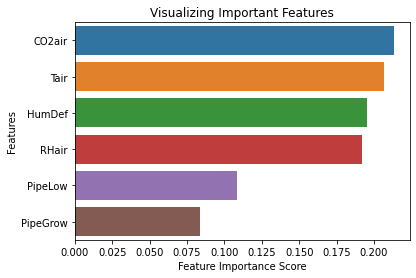

Visualizing Important Features Sonoma


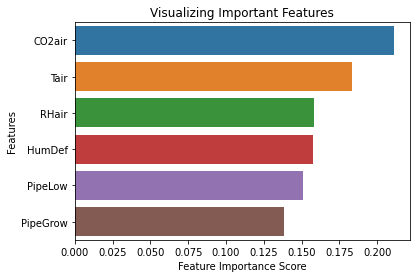

Visualizing Important Features iGrow


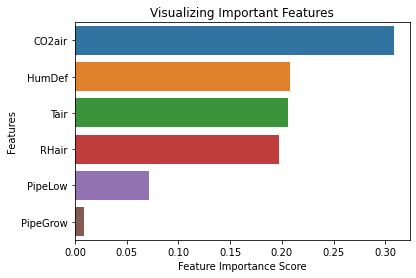

Visualizing Important Features DeepGreens


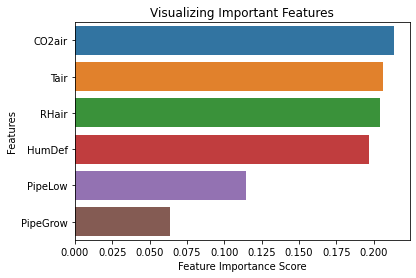

Visualizing Important Features AiCU


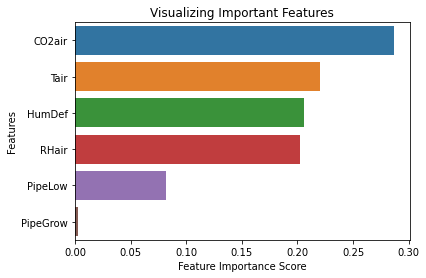

Visualizing Important Features Reference(Growers)


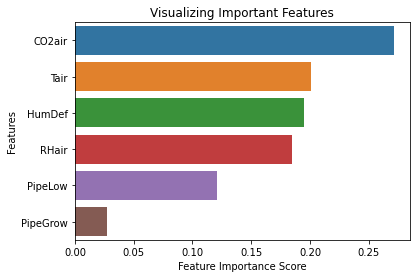

In [66]:
for team in datasets:
    tmp = data[team]['GHClim']
    feature_names = tmp.columns
    # Creating train and test sets
    X = tmp
    y = data[team]['prod']['Total_Prod_cum']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

    # Training model 
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train,y_train.astype('int'))

    y_pred = clf.predict(X_test)
    # Extracting importance from the model 
    feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
    feature_imp



    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                max_depth=None, max_features='auto', max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                oob_score=False, random_state=None, verbose=0,
                warm_start=False)


    print("Visualizing Important Features", team)
    # Creating a bar plot
    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
